
# Dataset

# Import all modules and packages necessary

In [ ]:
import pandas as pd
import kagglehub
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


# Loading and reading the dataset

In [ ]:
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
files = os.listdir(path)
csv_file = files[0]

dataset = os.path.join(path, csv_file)
df = pd.read_csv(dataset)

100%|██████████| 2.54k/2.54k [00:00<00:00, 3.21MB/s]

Extracting files...


In [ ]:
#Overview of the dataset
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


# Preprocessing

Cleaning and filling NaN data. First, we identify the missing values and then we replace them with a value

In [ ]:
null = df.isnull().sum()
null

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df["Sleep Disorder"].fillna("No sleep disorder", inplace= True)

/tmp/ipython-input-5-3107193001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sleep Disorder"].fillna("No sleep disorder", inplace= True)


Adjustments and creation of new columns

In [ ]:
df['Physical Activity Level'] = df['Physical Activity Level']/10

In [ ]:
df["Blood Pressure split"] = df["Blood Pressure"].str.split("/")
df["Blood Pressure quality"] = ['Normal' if int(x) < 120 and int(y)<80 else 'Préhypertension' if 120<=int(x)<130 and int(y)<80 else "Hypertension Stade 1" if 130<=int(x)<140 or 80<=int(y)<90 else "Hypertension Stade 2" for x,y in df["Blood Pressure split"] ]
df.drop("Blood Pressure split", axis = 1, inplace=True)
df['Blood Pressure quality'] = df['Blood Pressure quality'].apply(lambda x: 'Hypertensive' if 'Hypertension' in x else 'Non-hypertensive')

In [ ]:
df['BMI Category'] = df['BMI Category'].replace(["Overweight","Obese"], "Overweight")
df['BMI Category'] = df['BMI Category'].replace(["Normal","Normal Weight"], "Normal Weight")

In [ ]:
job_category = {
    'Software Engineer': 'Technical',
    'Engineer': 'Technical',
    'Scientist': 'Technical',

    'Sales Representative': 'Business',
    'Salesperson': 'Business',
    'Accountant': 'Business',
    'Manager': 'Business',
    'Lawyer': 'Business',

    'Doctor': 'Healthcare/Education',
    'Nurse': 'Healthcare/Education',
    'Teacher': 'Healthcare/Education'
}

df['Occupation_Group'] = df['Occupation'].map(job_category)


In [ ]:
df.drop("Daily Steps", axis = 1, inplace=True)

Hot_encoding

In [ ]:
dfg = pd.get_dummies(df, columns=['Blood Pressure quality','Occupation_Group','Gender','BMI Category','Sleep Disorder'], dtype=int)
dfg.head()

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Blood Pressure quality_Hypertensive,...,Occupation_Group_Business,Occupation_Group_Healthcare/Education,Occupation_Group_Technical,Gender_Female,Gender_Male,BMI Category_Normal Weight,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_No sleep disorder,Sleep Disorder_Sleep Apnea
0,1,27,Software Engineer,6.1,6,4.2,6,126/83,77,1,...,0,0,1,0,1,0,1,0,1,0
1,2,28,Doctor,6.2,6,6.0,8,125/80,75,1,...,0,1,0,0,1,1,0,0,1,0
2,3,28,Doctor,6.2,6,6.0,8,125/80,75,1,...,0,1,0,0,1,1,0,0,1,0
3,4,28,Sales Representative,5.9,4,3.0,8,140/90,85,1,...,1,0,0,0,1,0,1,0,0,1
4,5,28,Sales Representative,5.9,4,3.0,8,140/90,85,1,...,1,0,0,0,1,0,1,0,0,1


# Dataset Description

Description of the population sample and its criteria

In [ ]:
population_sample_size = len(df["Person ID"].unique())
population_sample_size

374

 Distribution of gender in the dataset

In [ ]:
gender = df["Gender"].value_counts()
gender

,count
Gender,
Male,189
Female,185


Distribution of sleep disorders in the dataset

In [ ]:
distribution = df["Sleep Disorder"].value_counts()
distribution

,count
Sleep Disorder,
No sleep disorder,219
Sleep Apnea,78
Insomnia,77


Distribution of Blood Pressure quality in the dataset

In [ ]:
df["Blood Pressure quality"].value_counts()

,count
Blood Pressure quality,
Hypertensive,332
Non-hypertensive,42


 Descriptive statistics of the dataset

In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,5.917112,5.385027,70.165775
std,108.108742,8.673133,0.795657,1.196956,2.083080,1.774526,4.135676
min,1.000000,27.000000,5.800000,4.000000,3.000000,3.000000,65.000000
25%,94.250000,35.250000,6.400000,6.000000,4.500000,4.000000,68.000000
50%,187.500000,43.000000,7.200000,7.000000,6.000000,5.000000,70.000000
75%,280.750000,50.000000,7.800000,8.000000,7.500000,7.000000,72.000000
max,374.000000,59.000000,8.500000,9.000000,9.000000,8.000000,86.000000


Distribution of BMI category in the dataset

In [ ]:
BMI_count = df.value_counts("BMI Category")
BMI_count

,count
BMI Category,
Normal Weight,216
Overweight,158


Occupations distribution in the dataset

In [ ]:
occupation = df["Occupation_Group"].value_counts()
occupation

,count
Occupation_Group,
Healthcare/Education,184
Business,119
Technical,71


Age distribution in the sample

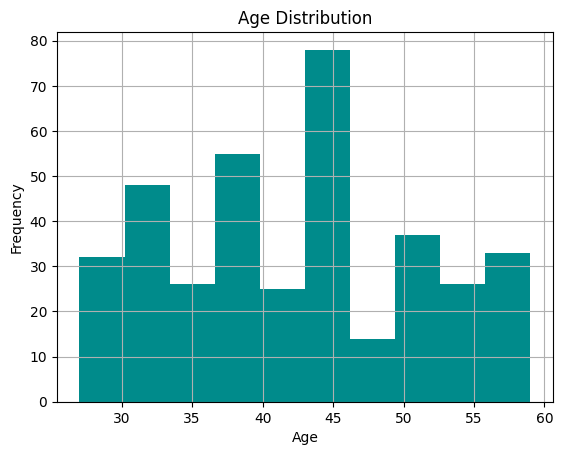

In [ ]:
plt.hist(df["Age"], color='darkcyan')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid()
plt.show()

# Data Visualization

Text(0.5, 1.0, 'Distribution of sleep disorders in the population (sample of 374 people)')

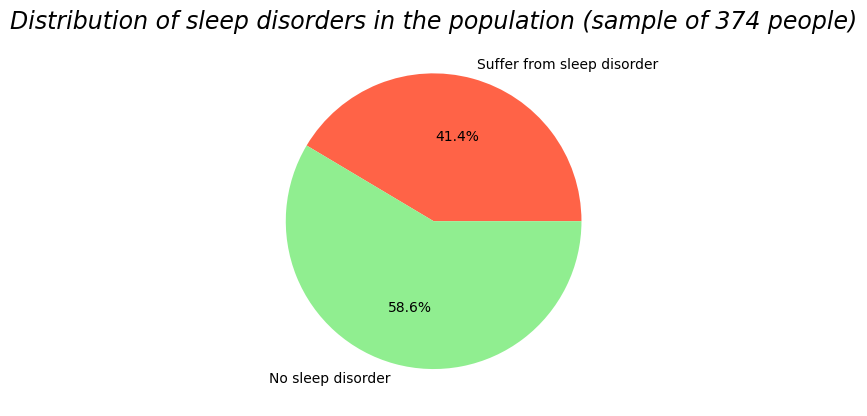

In [ ]:
no_disorder = len(df[df["Sleep Disorder"] == "No sleep disorder"])
disorder = population_sample_size - no_disorder

colors = ["tomato","lightgreen"]
values = [disorder, no_disorder]
labels = ["Suffer from sleep disorder", "No sleep disorder"]
plt.pie(values,labels = labels,colors = colors,autopct='%1.1f%%')
plt.title("Distribution of sleep disorders in the population (sample of 374 people)",fontsize=17,fontstyle= "italic")

Distribution of sleep disorder

Text(0.5, 1.0, 'Distribution of insomnia and apnea among people who suffered from disorder')

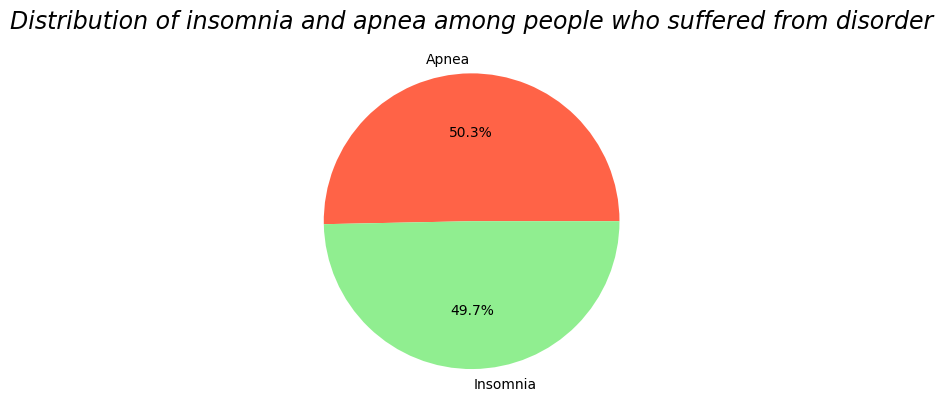

In [ ]:
apnea = len(df[df["Sleep Disorder"] == "Sleep Apnea"])
insomnia =len(df[df["Sleep Disorder"] == "Insomnia"])

colors = ["tomato","lightgreen"]
values = [apnea, insomnia]
labels = ["Apnea", "Insomnia"]
plt.pie(values,labels = labels,colors = colors,autopct='%1.1f%%')
plt.title("Distribution of insomnia and apnea among people who suffered from disorder",fontsize=17,fontstyle= "italic")

Text(0.5, 1.0, 'Distribution of sleep disorders by gender')

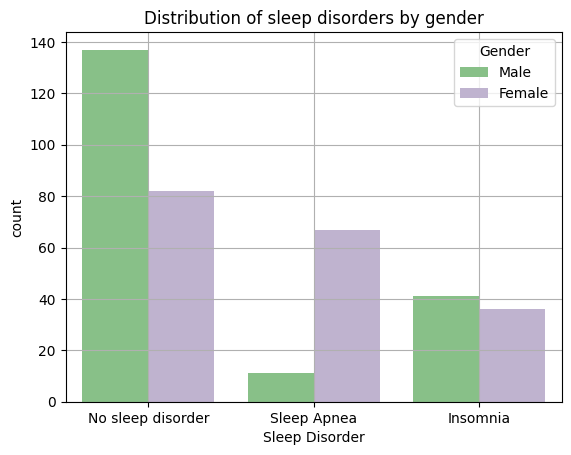

In [ ]:
sns.countplot(df, x="Sleep Disorder", hue = "Gender", palette = "Accent")
plt.grid()
plt.title("Distribution of sleep disorders by gender")

In [ ]:
c_numeriques = df.select_dtypes(include=['number']).columns.tolist()
c_categoriques = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

cg_numeriques = dfg.select_dtypes(include=['number']).columns.tolist()
cg_categoriques = dfg.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

In [ ]:
cg_numeriques

['Person ID',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Blood Pressure quality_Hypertensive',
 'Blood Pressure quality_Non-hypertensive',
 'Occupation_Group_Business',
 'Occupation_Group_Healthcare/Education',
 'Occupation_Group_Technical',
 'Gender_Female',
 'Gender_Male',
 'BMI Category_Normal Weight',
 'BMI Category_Overweight',
 'Sleep Disorder_Insomnia',
 'Sleep Disorder_No sleep disorder',
 'Sleep Disorder_Sleep Apnea']

Correlation matrix

Removing data from the correlation matrix that can be eliminated due to redundancy or mutual cancellation, in order to simplify the matrix

In [ ]:
to_remove = ["Person ID","BMI Category_Normal Weight","Gender_Male","Blood Pressure quality_Non-hypertensive"]

for col in to_remove:
  cg_numeriques.remove(col)

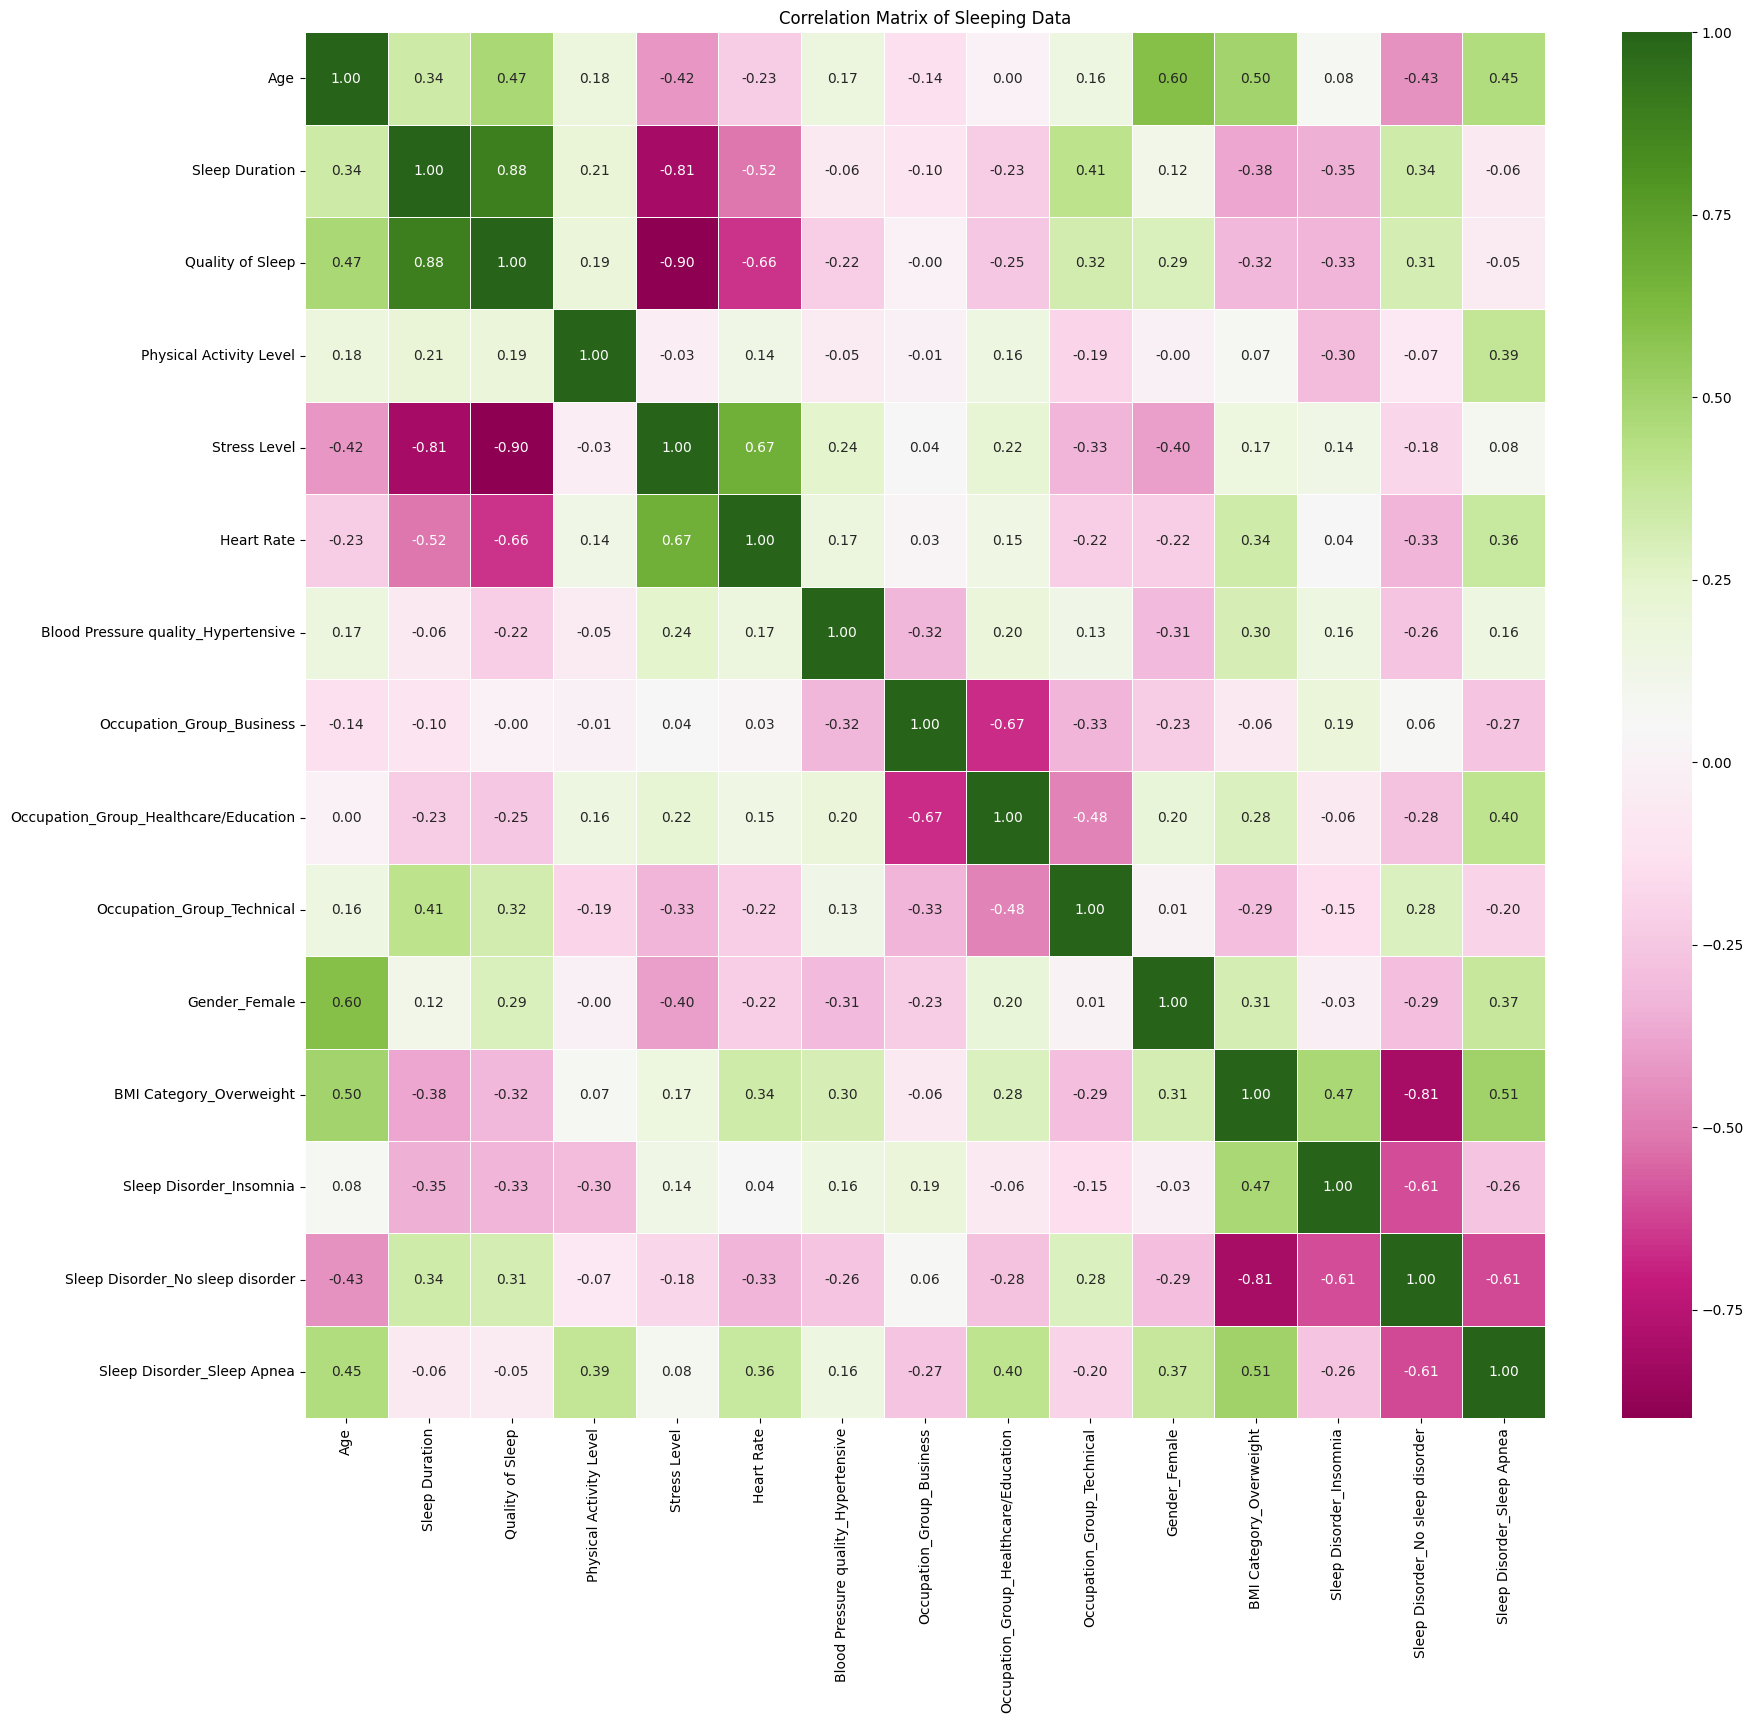

In [ ]:
correlation_matrix = dfg[cg_numeriques].corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f", linewidths=.7)
plt.title('Correlation Matrix of Sleeping Data')
plt.show()


In [ ]:
gp_sleep_num = df.groupby('Sleep Disorder').mean(c_numeriques)

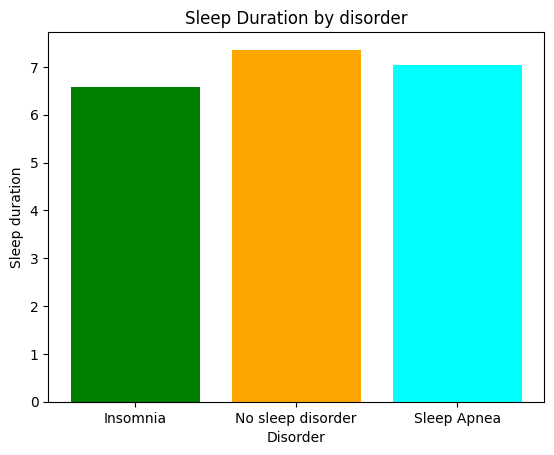

In [ ]:
plt.bar(gp_sleep_num.index, gp_sleep_num["Sleep Duration"], color = ['green','orange',"cyan"])
plt.title('Sleep Duration by disorder')
plt.xlabel('Disorder')
plt.ylabel('Sleep duration')
plt.show()

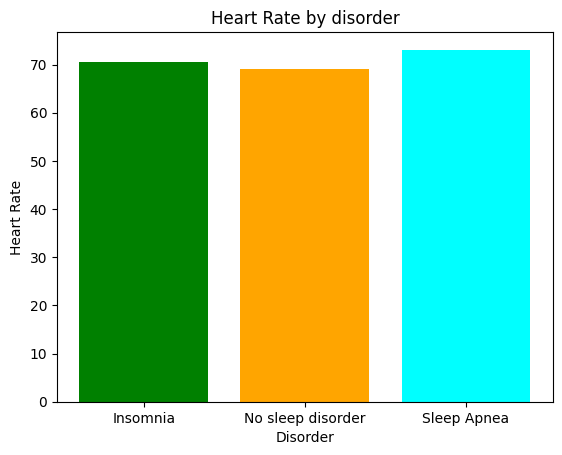

In [ ]:
plt.bar(gp_sleep_num.index, gp_sleep_num["Heart Rate"], color = ['green','orange',"cyan"])
plt.title('Heart Rate by disorder')
plt.xlabel('Disorder')
plt.ylabel('Heart Rate')
plt.show()

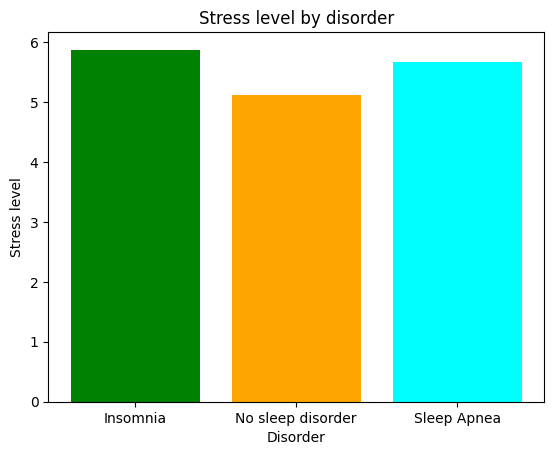

In [ ]:
plt.bar(gp_sleep_num.index, gp_sleep_num["Stress Level"], color = ['green','orange',"cyan"])
plt.title('Stress level by disorder')
plt.xlabel('Disorder')
plt.ylabel('Stress level')
plt.show()

Impact of categorical factors on sleep disorder

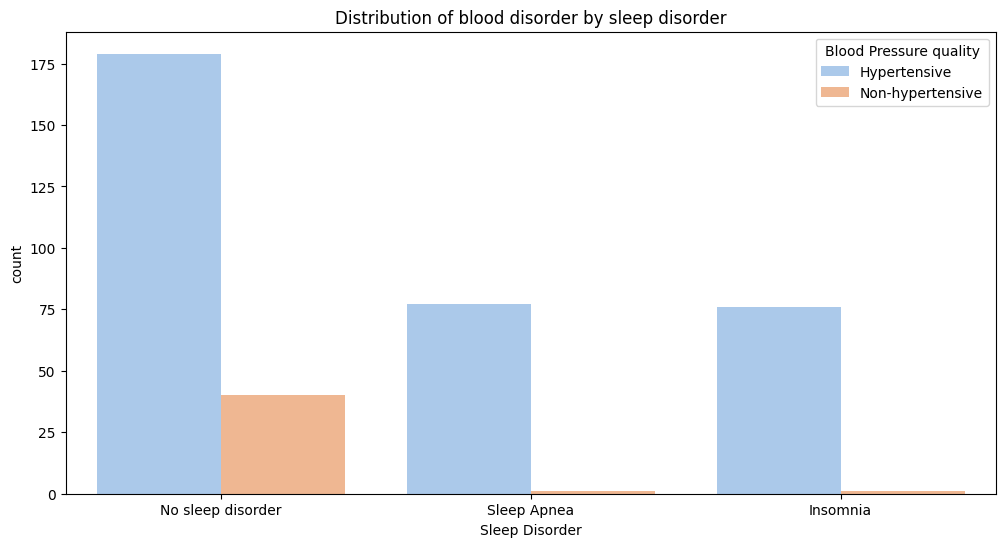

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Sleep Disorder", hue="Blood Pressure quality", palette="pastel")
plt.title("Distribution of blood disorder by sleep disorder")
plt.show()

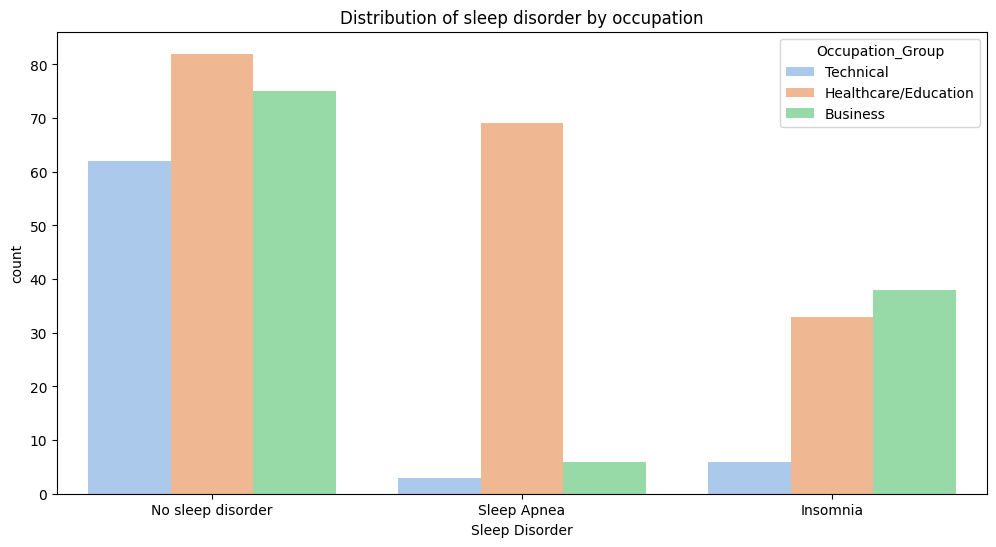

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Sleep Disorder", hue="Occupation_Group", palette="pastel")
plt.title("Distribution of sleep disorder by occupation")
plt.show()

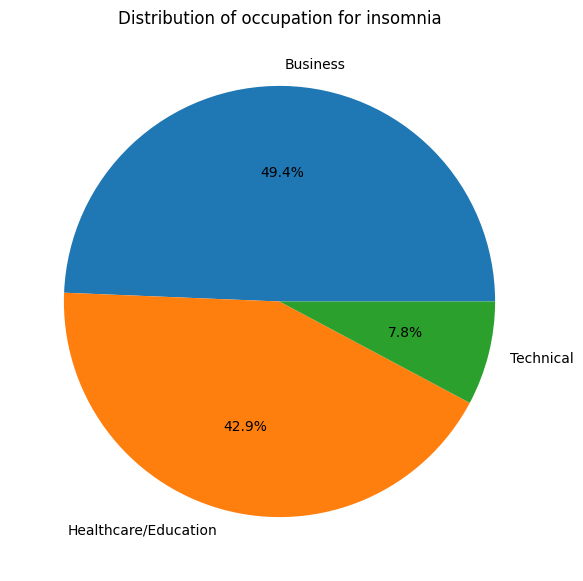

In [ ]:
insomnia_df = df[df["Sleep Disorder"] == "Insomnia"]
occupation_counts = insomnia_df["Occupation_Group"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(occupation_counts,labels=occupation_counts.index,autopct="%1.1f%%")
plt.title("Distribution of occupation for insomnia")
plt.show()

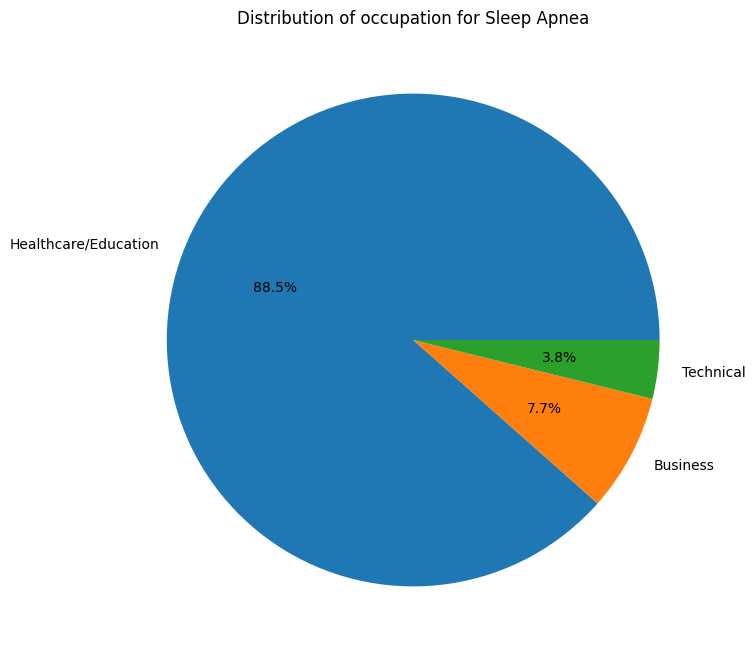

In [ ]:
insomnia_df = df[df["Sleep Disorder"] == "Sleep Apnea"]
occupation_counts = insomnia_df["Occupation_Group"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(occupation_counts,labels=occupation_counts.index,autopct="%1.1f%%")
plt.title("Distribution of occupation for Sleep Apnea")
plt.show()

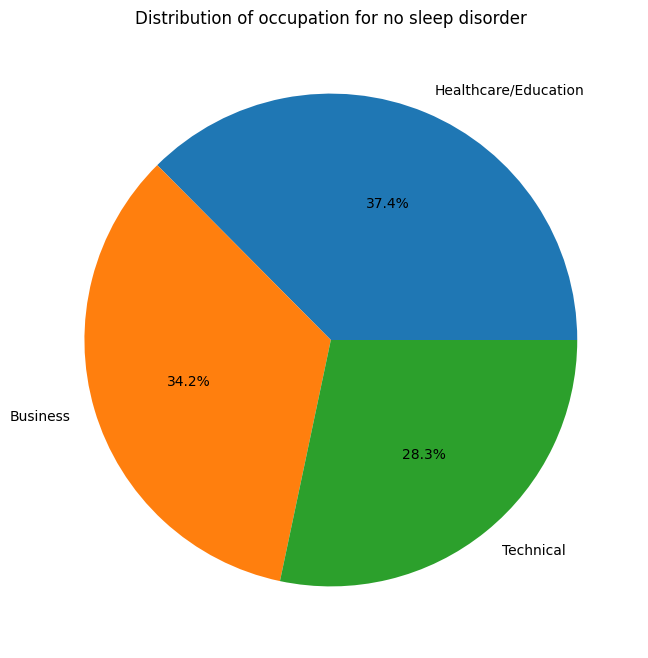

In [ ]:
insomnia_df = df[df["Sleep Disorder"] == "No sleep disorder"]
occupation_counts = insomnia_df["Occupation_Group"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(occupation_counts,labels=occupation_counts.index,autopct="%1.1f%%")
plt.title("Distribution of occupation for no sleep disorder")
plt.show()

Distribution of sleep disorders according to BMI category

In [ ]:
BMI_count_d = df.groupby("BMI Category")["Sleep Disorder"].value_counts()
BMI_count_d

BMI Category   Sleep Disorder   
Normal Weight  No sleep disorder    200
               Insomnia               9
               Sleep Apnea            7
Overweight     Sleep Apnea           71
               Insomnia              68
               No sleep disorder     19
Name: count, dtype: int64

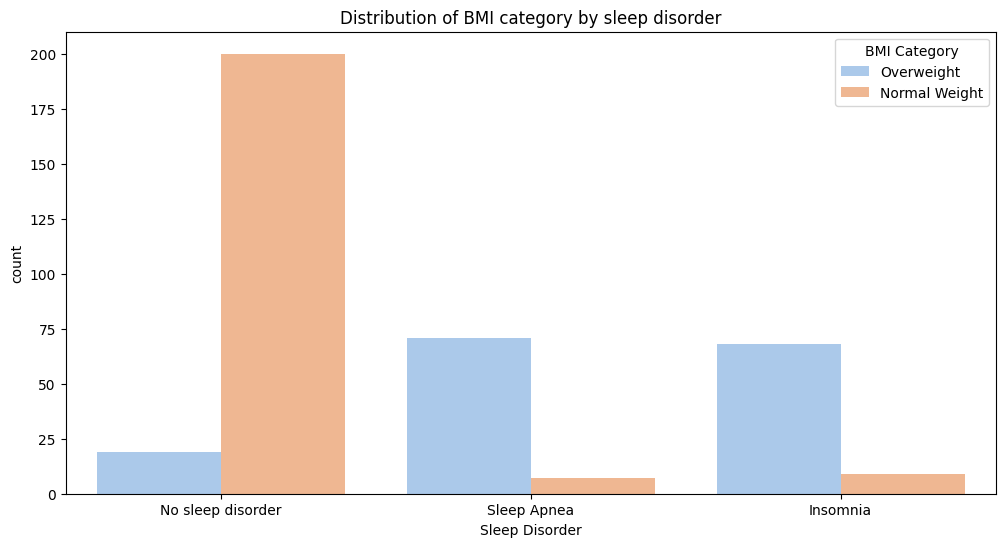

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Sleep Disorder", hue="BMI Category", palette="pastel")
plt.title("Distribution of BMI category by sleep disorder")
plt.show()

Impact of numerical factors on sleep disorder

In [ ]:
gp_sleep_num

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate
Sleep Disorder,,,,,,,
Insomnia,216.272727,43.519481,6.589610,6.532468,4.681818,5.870130,70.467532
No sleep disorder,146.972603,39.036530,7.358447,7.625571,5.794977,5.114155,69.018265
Sleep Apnea,272.884615,49.705128,7.032051,7.205128,7.479487,5.666667,73.089744


<function matplotlib.pyplot.show(close=None, block=None)>

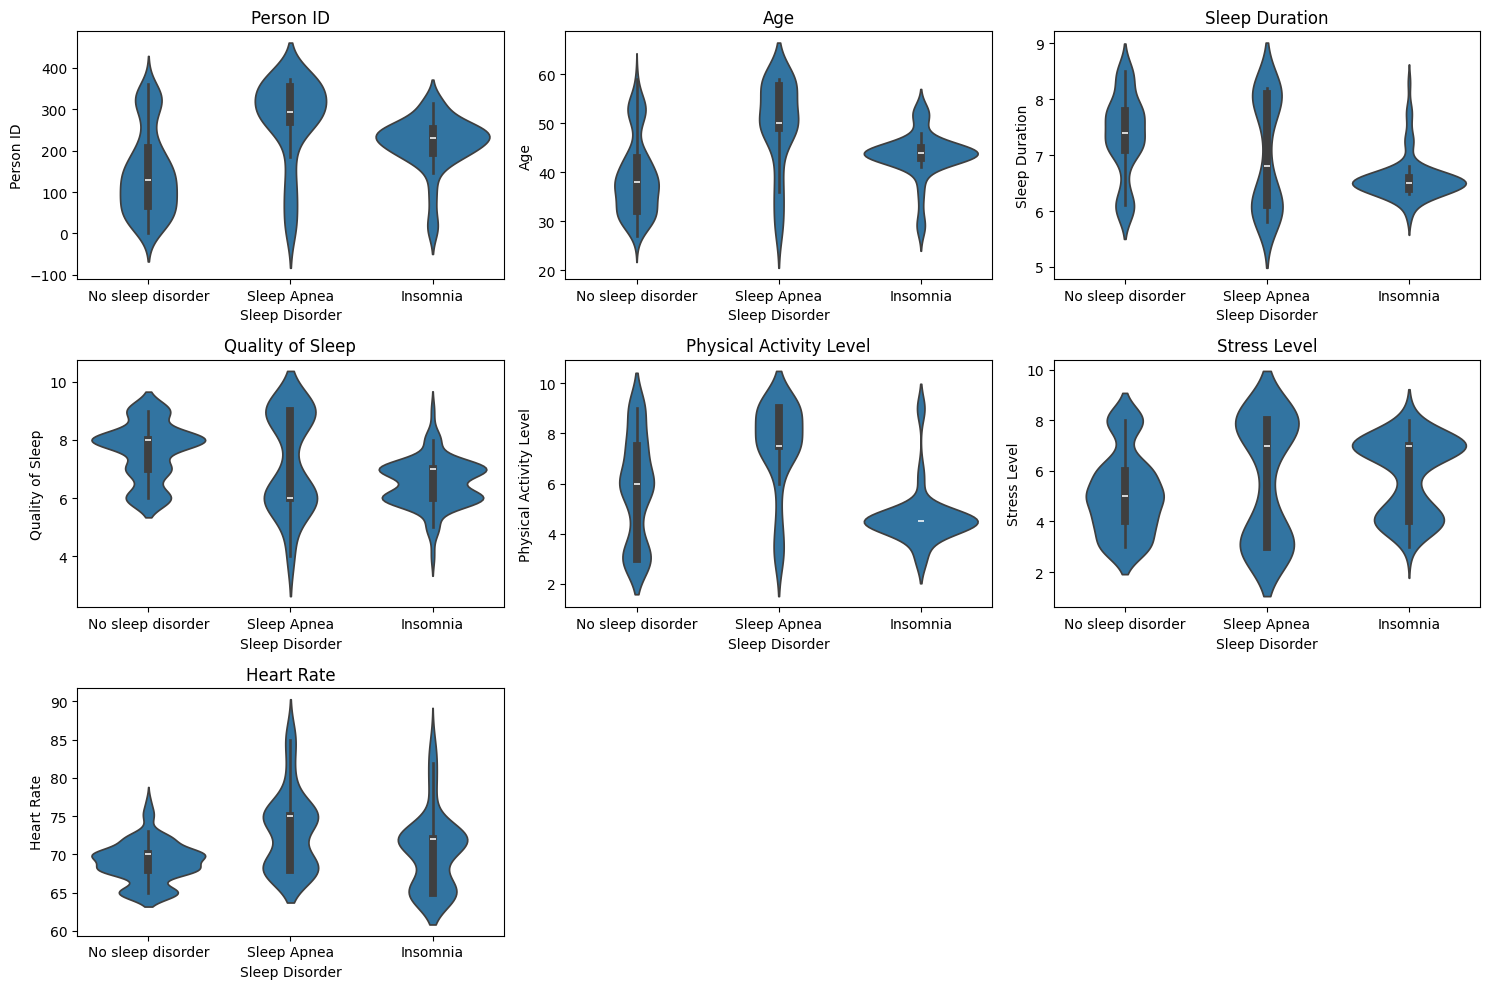

In [ ]:
plt.figure(figsize=(15,10))
for c in c_numeriques:
  plt.subplot(3,3,c_numeriques.index(c)+1)
  sns.violinplot(y = df[c], x=df["Sleep Disorder"])
  plt.title(c)
plt.tight_layout()
plt.show

# Machine learning

In [ ]:
#Make the  sleep disorders numeric
"""
0: Insomnia
1: No sleep disorder
2 : Sleep apnea
"""

le = LabelEncoder()
df["Sleep Disorder numeric"] = le.fit_transform(df["Sleep Disorder"])
print(df["Sleep Disorder numeric"])

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder numeric, Length: 374, dtype: int64


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4281 - loss: 7.3742 - val_accuracy: 0.6000 - val_loss: 3.1017
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5333 - loss: 3.0721 - val_accuracy: 0.1500 - val_loss: 1.9149
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3168 - loss: 1.7450 - val_accuracy: 0.5833 - val_loss: 1.4446
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4894 - loss: 1.4913 - val_accuracy: 0.5000 - val_loss: 1.2446
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5990 - loss: 1.1869 - val_accuracy: 0.5000 - val_loss: 1.1243
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4995 - loss: 1.1742 - val_accuracy: 0.5333 - val_loss: 1.0428
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5487 - loss: 1.0752 - val_accuracy: 0.5333 - val_loss: 0.9819
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6097 - loss: 0.9337 - val_accuracy: 0.5667 - 

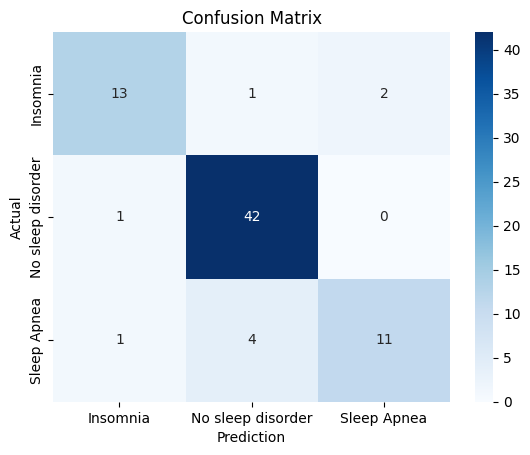

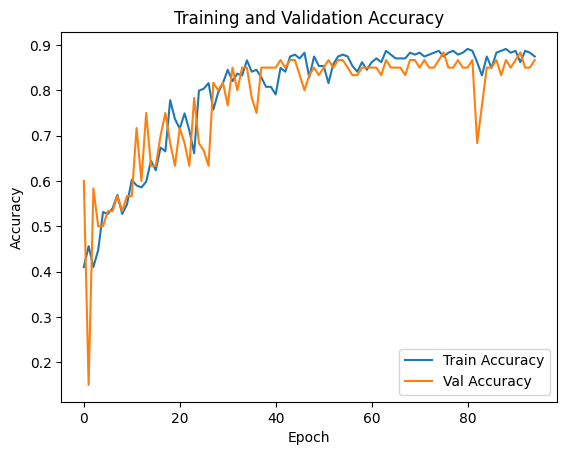

Accuracy       : 0.880
Precision (w)  : 0.878
Recall (w)     : 0.880
F1-score (w)   : 0.876

                   precision    recall  f1-score   support

         Insomnia       0.87      0.81      0.84        16
No sleep disorder       0.89      0.98      0.93        43
      Sleep Apnea       0.85      0.69      0.76        16

         accuracy                           0.88        75
        macro avg       0.87      0.83      0.84        75
     weighted avg       0.88      0.88      0.88        75



In [ ]:
#Features engineering
"""
We are trying to detect if a patient has a sleeping disorder
"""

features = [
    "Age",
    "Sleep Duration",
    "Quality of Sleep",
    "Stress Level",
    "Heart Rate",
    "Physical Activity Level"
]

X = df[features]
y = df["Sleep Disorder numeric"]


# One hot encoding for keras actions
y_cat = to_categorical(y, num_classes=3)

# Split the dataset to train and test the model
X_train, X_test, y_train_cat, y_test_cat = train_test_split(X, y_cat, test_size=0.2, random_state=42)
y_test = np.argmax(y_test_cat, axis=1)

# Creating a keras model
model = Sequential([
    InputLayer(shape=(X_train.shape[1],)),
    Dense(units=64, activation="relu"),
    Dense(units=3, activation="softmax")  # 3 classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# Predictions using the test sample
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Overall Scores
print(f"Accuracy       : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision (w)  : {precision_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Recall (w)     : {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"F1-score (w)   : {f1_score(y_test, y_pred, average='weighted'):.3f}\n")

#Scores by sleep disorders
print(classification_report(y_test, y_pred, target_names=le.classes_))

